

# Project: Investigating TMDB movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This report examines data on over 10,000 movies on IMDB. The information given includes the budget, poularity, cast, director and many more about each of the movies. The aim is to discover the relationship between the revenue/profit of the movie and the other factors given.

><br>Research Question 1 - Correlation between profit & popularity, runtime, adjusted budget, Release date
><br>Research Question 2  - Relationship between Director, cast and  Profitability

In [1]:
# importing packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

>**REPORT OBJECTIVE** - The aim of this report is to discover the effect of Popularity, budget, runtime and release date on the revenue of the movie. Also, this report aims to figure out what director and cast made the most profitable movie.

<a id='wrangling'></a>
## Data Wrangling
<br>Research Question 1 - Correlation between profit & popularity, runtime, adjusted budget, Release date
<br>Research Question 2  - Relationship between Director, cast and  Profitability

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#see the shape of the dataframe
df.shape

(10866, 21)

In [4]:
#checking if there are null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#checking to see the datatypes and the number of non-null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Key point** - In previous four cells:
<br> - The data was loaded into a dataframe
<br> - The shape of the dataframe was displayed
<br> - The number of null elements per column was outputed
<br>- The data type of each column was also showed

In [6]:
#summary statistics on the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**key point** - The previous cell gives a summary of the figures in the data set. We can easily see the outliers and or anomalies in the data.

In [7]:
#check for numerical columns containing zero which should not
print(df.query('revenue_adj==0').count(), '\n')
print(df.query('budget_adj==0').count())

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64
id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
g

**key point** - The previous cell showed we have 6016 revenue rows with zero and 5696 budget rows with zeros
<br>          - The budget rows align with the budget_adj rows while the column rows align with the column_adj rows

In [8]:
#Check if there are duplicate rows
df.duplicated().sum()

1


### Data Cleaning 
<br>Research Question 1 - Correlation between profit & popularity, runtime, adjusted budget, Release date
<br>Research Question 2  - Relationship between Director, cast and  Profitability

**Here we will:**
<br> -change the data type for the date and year columns
<br> -create a column for profit
<br> -drop the columns not needed for our analysis
<br> -drop the null columns
<br> -drop the duplicates
<br> -drop the rows where budget/revenue is 0
<br> -convert the cast, production companies and genres colums into list data types

In [9]:
#Converting 2 digit years date to 4 digit years
#Looking at the release date and release year, we can confirm what the year is
df['release_date']
a =df['release_date'].str[:-2]
b =df['release_year'].astype(str)
df['release_date'] = a + b
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

In [10]:
#convert release year to datetime format
df['release_year']= pd.to_datetime(df['release_year']).dt.normalize()
df['release_year']

0       1970-01-01
1       1970-01-01
2       1970-01-01
3       1970-01-01
4       1970-01-01
           ...    
10861   1970-01-01
10862   1970-01-01
10863   1970-01-01
10864   1970-01-01
10865   1970-01-01
Name: release_year, Length: 10866, dtype: datetime64[ns]

**key point** - In the previous two cells, the date and year columns have been converted to datetime formats

In [11]:
#create a column for profit_adj
df['profit_adj']= df['revenue_adj'] - df['budget_adj']
df['profit_adj']

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10861    0.000000e+00
10862    0.000000e+00
10863    0.000000e+00
10864    0.000000e+00
10865   -1.276423e+05
Name: profit_adj, Length: 10866, dtype: float64

In [12]:
#There are several columns that are not needed for this analysis. These columns will be dropped

df.drop(['id','budget','revenue','vote_count','vote_average','imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09


In [13]:
#Checking the duplicates again and rows with zero value
print(df.duplicated().sum())
print(df.isnull().sum())
df.budget_adj .isin([0]).sum()

1
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
profit_adj                 0
dtype: int64


5696

In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)

#remove the NA rows in the data set
df.dropna(axis=0,how='all',inplace=True)

#replace  zeros with NaN
df.replace(0, np.NaN,inplace=True) 

df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,1970-01-01,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,1970-01-01,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,1970-01-01,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,1970-01-01,1.747999e+08,1.385749e+09,1.210949e+09


In [15]:
#confirming the dulplicates, null and zero entries have been handled
print(df.duplicated().sum())
print(df.isnull().sum())
df.revenue_adj.isin([0]).sum()

0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj              5696
revenue_adj             6016
profit_adj              4705
dtype: int64


0

**key point** - All duplicates have been removed. All rows where revenue_adj or budget_adj is 0 has been replaced with NaN to preserve our sample size as much as possible

In [16]:
#convert genres into a list and explode 
df_genres= df.assign(genres=df.genres.str.split('|')).explode('genres')
df_genres.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,1970-01-01,1.379999e+08,3.481613e+08,2.101614e+08


In [17]:
#seperate the cast into individuals to analyse later
df_cast=df.assign(cast=df.cast.str.split('|')).explode('cast')
df_cast.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09


In [18]:
#explode the production companies into individual companies for analysis
df_production = df.assign(production_companies=df.production_companies.str.split('|')).explode('production_companies')
df_production.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,1970-01-01,1.379999e+08,1.392446e+09,1.254446e+09


**key point**- The last 3 cells converted the cast, genre and production companies columns into lists

In [19]:
#view our data details and statistical summary after cleaning
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   original_title        10865 non-null  object        
 2   cast                  10789 non-null  object        
 3   director              10821 non-null  object        
 4   runtime               10834 non-null  float64       
 5   genres                10842 non-null  object        
 6   production_companies  9835 non-null   object        
 7   release_date          10865 non-null  datetime64[ns]
 8   release_year          10865 non-null  datetime64[ns]
 9   budget_adj            5169 non-null   float64       
 10  revenue_adj           4849 non-null   float64       
 11  profit_adj            6160 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 1.1+ MB


,popularity,runtime,budget_adj,revenue_adj,profit_adj
count,10865.000000,10834.000000,5.169000e+03,4.849000e+03,6.160000e+03
mean,0.646446,102.363855,3.688907e+07,1.151009e+08,5.965010e+07
std,1.000231,30.948225,4.196096e+07,1.988557e+08,1.616077e+08
min,0.000065,2.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,0.207575,90.000000,8.102293e+06,1.046585e+07,-5.343712e+06
50%,0.383831,99.000000,2.271505e+07,4.395666e+07,5.069681e+06
75%,0.713857,112.000000,5.008384e+07,1.316482e+08,6.131800e+07
max,32.985763,900.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis 

### Research Question 1 - Correlation between profit & popularity, runtime, adjusted budget, Release date

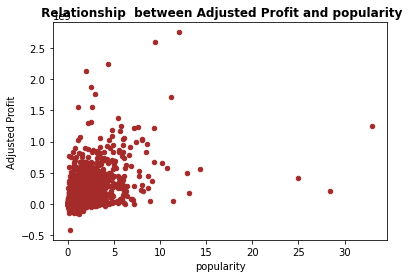

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def plot_scatter (df,x,y,color='brown'):
    """
    This function plots scatter plots given the two variables
    """
    df[[x,y]].plot(x,y,kind='scatter',color='brown')    
    if y == 'profit_adj' :
        y = 'Adjusted Profit'    
    if x == 'budget_adj':
        x = 'Adjusted Budget'    
    if x == 'release_date':
        x = 'Release date'   
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f' Relationship  between {y} and {x}',fontweight='bold')
    
#calling the function to plot popularity vs adjusted profit
plot_scatter(df,'popularity','profit_adj')

**observation** - The popularity of a movie shows slight real correlation with how profitable the movie is.

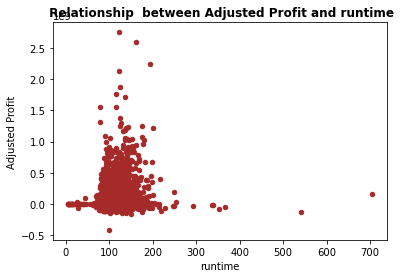

In [21]:
#plot of runtime vs adjusted profit
plot_scatter(df,'runtime','profit_adj')

**observation** - The movie runtime shows no real correlation with how profitable the movie is.

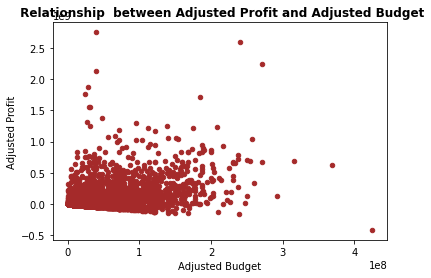

In [22]:
#plot of Adjusted profit vs Adjusted budget
plot_scatter(df,'budget_adj','profit_adj')

**observation**- The budget for the movie shows no real correlation with how profitable the movie is.

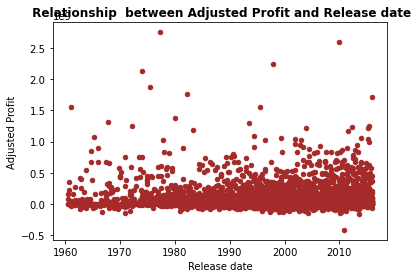

In [23]:
#plotting release date against profit
plot_scatter(df,'release_date','profit_adj')

**observation** - The movie's release date shows no real correlation with how profitable the movie is.

**key points**- from the last 3 cells, when comparing popularity, runtime, release date and budget with profit, it can be seen that only popularity shows some correlation with profit.

### Research Question 2  - Relationship between Director, cast and  Profitability

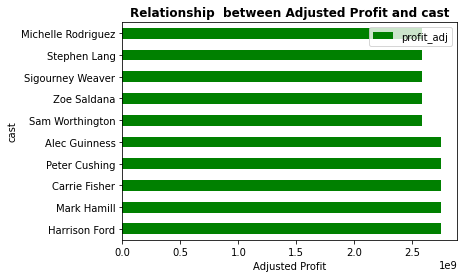

In [24]:
# Plot of the cast making the most profit
def bar_hor (df,x,y,color='orange'):
    """
    This function plots bar graphs given the two variables
    """
    df.plot(x,y,kind='barh',color='green')
    if y == 'profit_adj' :
        y = 'Adjusted Profit'    
    if x == 'production_companies':
        x = 'Production Companies'    
    if x == 'release_date':
        x = 'Release date' 
    plt.xlabel(y)
    plt.ylabel(x)
    plt.title(f'Relationship  between {y} and {x}',fontweight='bold');

#extracting the top 5 cast by adjusted profit
top_5 =df_cast[['cast','profit_adj']].sort_values('profit_adj',ascending=False).head(10)

#calling the bar chart plot function
bar_hor(top_5,'cast','profit_adj')

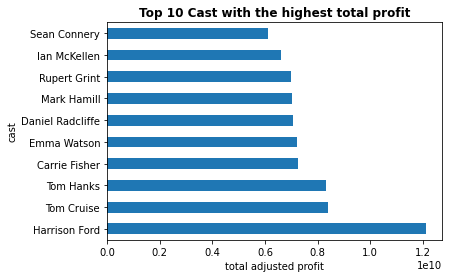

In [25]:
#using the exploded cast dataframe to extract the top 10 cast with highest total profit
each_cast=df_cast.groupby('cast')['profit_adj'].sum().nlargest(10)
each_cast.plot(kind='barh')
plt.title('Top 10 Cast with the highest total profit',fontweight ='bold')
plt.xlabel('total adjusted profit');

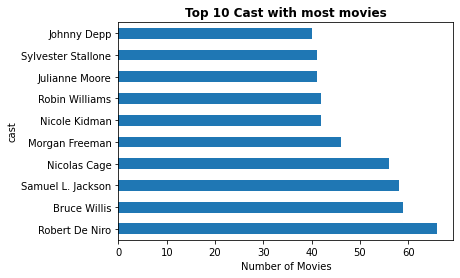

In [26]:
#using the exploded cast dataframe to extract the top 10 cast with highest number of movies
no_of_movies=df_cast.groupby('cast')['profit_adj'].count().nlargest(10)
no_of_movies.plot(kind='barh')
plt.title('Top 10 Cast with most movies',fontweight ='bold')
plt.xlabel('Number of Movies');

**Observation**- From the last two cells, it can be seen that the the number of movies does not show positive correlation with profit

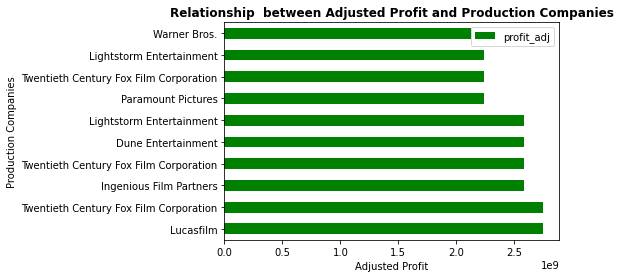

In [27]:
#plot production companies with the most profit
top_companies = df_production[['production_companies','profit_adj']].nlargest(10,'profit_adj')
bar_hor(top_companies,'production_companies','profit_adj')

**Observation**- Twentieth Century Fox produced 3 of the  top 10 most profitable movies
            <br>- Lightstorm Entertainment produced 2 of the  top 10 most profitable movies

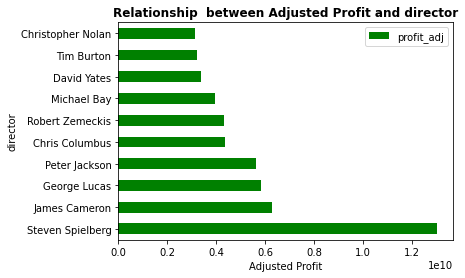

In [28]:
# Director with the most profit between 1960 and 2015
group_director=df.groupby('director')[['cast','profit_adj']].sum()
final =group_director.nlargest(10,group_director).reset_index()
bar_hor(final,'director','profit_adj')

**Observation** -  Steven Spielberg made the highest single profit in amovie


<a id='conclusions'></a>
## Conclusions
>**REPORT OBJECTIVE** - The aim of this report is to discover the effect of Popularity, budget, runtime and release date on the revenue of the movie. Also, this report aims to figure out what director and cast made the most profitable movie.


- From the visualizations,it can be seen that:
1. Popularity shows correlation with the profit
2. Runtime shows no correlation with profit
3. Release date shows no correlation with the profit
4. Budget shows no correlation with profit


<br>- However, we can not conclude that by increasing a movie's popularity, there would be increased profit. This research is limited to correlation and causation cannot be establishing without performing deeper statistical analysis. 

<br> - Another limitation with this analysis has to do with the several missing values in a number of columns. Also, there are budget, revenue and profit columns with zeros. These  two factors increased our margin of error and reduced our sample size somewhat.


## Reference
<br> pandas.pydata.org